# Exercici 0:





Posem en una cel·la els codis dels mètodes de Jacobi, Gauss-Seidel i de $\omega$-relaxació

In [1]:
import numpy as np

def norma(u):
    return np.sqrt(sum(u**2))

def wrelax(A, b, x0, w, abstol=1.e-10, reltol=1.e-10, maxIter=1000):
    Emin = min (reltol*norma(x0),abstol)
    m, n = A.shape
    x = x0.copy()
    i = 0
    acabat = False
    while not acabat:
        i = i + 1
        x0 = x.copy()
        for j in range(n):
            x[j] = (1-w) * x[j] + (w/A[j,j]) * (b[j] - sum(A[j, :]*x[:]) + A[j,j]*x[j])
        Emin = min (reltol*norma(x),Emin)
        if((norma(x0 - x) < Emin) or i > maxIter):
            acabat = True

        if(i > maxIter):
            if(norma(x0 - x) > abstol and norma(x0-x) / norma(x) < reltol):
                return x, -1
            if(norma(x0 - x) > abstol and norma(x0-x) / norma(x) > reltol):
                return x, -2
            return x, -3
    return x, i

def Jacobi(A,b, x, abstol=1.e-10, reltol=1.e-10, maxIter = 1000):
  n = x.size
  xk = x.copy()
  atol = False
  rtol = False
  for k in range (maxIter):
    s = 0
    for i in range (n):
      s = sum(A[i,:]*x[:])
      s -= A[i,i]*x[i]
      xk[i] = 1/(A[i,i])*(b[i] - s)
    if atol == False and norma(xk - x) < abstol:
      atol = True
    if rtol == False and norma(xk-x)/norma(xk) < reltol:
      rtol = True
    if (atol and rtol):
      return xk, k
    x = xk.copy()
  if rtol:
    return xk, -1
  elif atol:
    return xk, -2
  return xk, -3

Creem la matriu A i els vectors b i $x_0$. Després apliquem els codis dels dos mètodes.

En el cas del mètode de Gauss-Seidel donem a $\omega$ el valor  $\omega = 1$ ja que tots dos tenen el mateix codi.

In [2]:
A = np.zeros((8,8), dtype = np.float64) #Creem la matriu A del sistema.
for i in range (8):
    A[i,i] = 2
for i in range (7):
    A[i,i+1] = -1
    A[i+1,i] = -1

b = np.array([1,1,1,1,1,1,1,1], dtype = np.float64)
x = np.array([1,1,1,1,1,1,1,1], dtype = np.float64)

print (f"Jacobi : {Jacobi(A,b,x)}")
print (f"GS : {wrelax(A,b,x,1)}") # Apliquem el mètode de relaxació amb omega=1
print (f"w1.5 : {wrelax(A,b,x,1.50)}") # Encara cal justificar!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!


Jacobi : (array([ 4.,  7.,  9., 10., 10.,  9.,  7.,  4.]), 373)
GS : (array([ 4.,  7.,  9., 10., 10.,  9.,  7.,  4.]), 194)
w1.5 : (array([ 4.,  7.,  9., 10., 10.,  9.,  7.,  4.]), 39)


Veiem doncs que farem 373 iteracions amb el mètode de Jacobi i 194 si el fem amb el mètode de Gauss-Seidel.

Calculem ara el valor òptim de $\omega$ per al mètode de $\omega$-relaxació successiva i les iteracions necessàries.

Primer de tot, cal que determinem la matriu $G_1$. Ho farem resolent el sistema $$ (D+L) \cdot G_1 = D - U $$

Invertim la matriu D+L, ja que no és gaire difícil i el seu cost no serà gaire alt. Per

On G_1 és la incògni

In [3]:
from scipy.linalg import solve_triangular

A = np.zeros((8,8), dtype = np.float64) #Creem la matriu A del sistema.
for i in range (8):
    A[i,i] = 2
for i in range (7):
    A[i,i+1] = -1
    A[i+1,i] = -1

b = np.array([1,1,1,1,1,1,1,1], dtype = np.float64)
x = np.array([1,1,1,1,1,1,1,1], dtype = np.float64)

U = np.zeros((8,8), dtype = np.float64)
for i in range (7):
    U[i,i+1] = -1
G1 = solve_triangular(A-U,U,lower = True) #obtenim la matriu de la que cal fer el radi espectral
print (G1)



[[ 0.         -0.5         0.          0.          0.          0.
   0.          0.        ]
 [ 0.         -0.25       -0.5         0.          0.          0.
   0.          0.        ]
 [ 0.         -0.125      -0.25       -0.5         0.          0.
   0.          0.        ]
 [ 0.         -0.0625     -0.125      -0.25       -0.5         0.
   0.          0.        ]
 [ 0.         -0.03125    -0.0625     -0.125      -0.25       -0.5
   0.          0.        ]
 [ 0.         -0.015625   -0.03125    -0.0625     -0.125      -0.25
  -0.5         0.        ]
 [ 0.         -0.0078125  -0.015625   -0.03125    -0.0625     -0.125
  -0.25       -0.5       ]
 [ 0.         -0.00390625 -0.0078125  -0.015625   -0.03125    -0.0625
  -0.125      -0.25      ]]


In [4]:

wopt = 2/(1+ np.sqrt(1))
print (wopt)

1.0


# Exercici 1
Cal crear una funció que resolgui una EDO, donada una funció F.

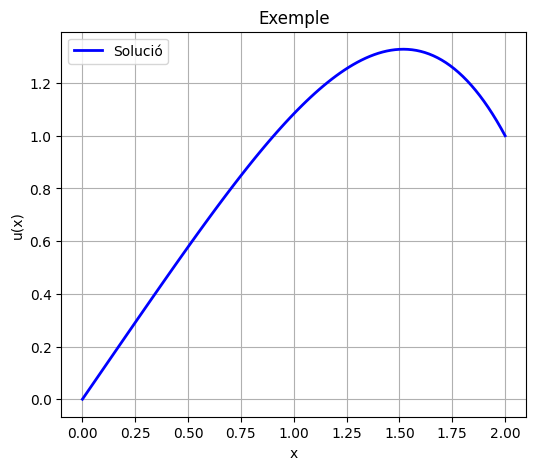

1.0832999999998625
1.099763999999862
-0.8231999999999795
1.0


In [5]:
import numpy as np
import math
import matplotlib.pyplot as plt
def solEstEq1D(a, b, ca, cb, N, F, maxIter=1.e5, tol=1.e-10):
    #On a i b són els extrems del interval, i ca i cb són els punts extrems
    #Definim el vector u i l'inicialitzem:
    u0 = (ca + cb) / 2
    u = np.full((N+1), u0, dtype=np.float64)
    u[0] = ca
    u[-1] = cb
    Fi = np.empty((N+1), dtype=np.float64)
    delta = (b - a)/N
    for i in range(N+1):
        Fi[i] = F(a + delta*i)

    for i in range(int(maxIter)):
        u[1:N] = (u[:N-1]+u[2:] + delta**2 * Fi[1:N])/2
    return(u, 0)




def dibuixaSol1D(u,a,b,titol='Exemple'):
    # Nombre de punts:
    Nplus1 = u.shape[0]

    # Malla equiespaiada:
    x = np.linspace(a,b,Nplus1)

    # Obrim la Figura i dibuixem:
    plt.figure(figsize=(6, 5))

    # Plot:
    plt.plot(x, u, label="Solució", color="b", linewidth=2)

    # Eixos i llegenda
    plt.xlabel("x")
    plt.ylabel("u(x)")
    plt.title(titol)
    plt.grid(True)
    plt.legend()

    # Mostrem el dibuix:
    plt.show()
def funcio(x):
    return x**2


N = 100
a,b = 0, 2
ca,cb = 0,1

u,niter = solEstEq1D(a, b, ca, cb, N, funcio, maxIter = 1.e5)
dibuixaSol1D(u,a,b)
print(u[50])
print(u[51])
print((u[50]-u[51])*N / (b - a))
print(funcio(a + 50*(b-a)/N))

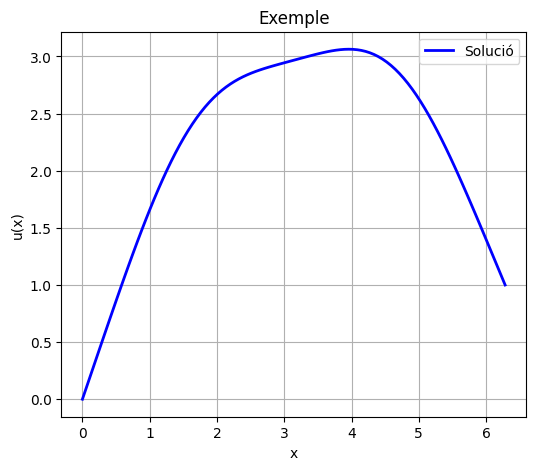

Aproximaxió de f(pi): 2.9674011002719896


In [9]:
def funcio2(x):
    return np.sin(x)**2

N = 100
a,b = 0, 2*np.pi
ca,cb = 0,1

u,niter = solEstEq1D(a, b, ca, cb, N, funcio2, maxIter = 1.e5)
dibuixaSol1D(u,a,b)
print(f"Aproximaxió de f(pi): {(u[50])}")


# Exercici 2:

Primer, posem el codi de la funció plotFME amb la qual representarem la temperatura de la FME.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

def plotFME(U,umin=None, umax=None):
    """
    Visualització interactiva de la temperatura de la FME

    Paràmetres:
    -----------
    U : array 3D
        Dades a visualitzar (shape: [N+1, M+1, P+1], suposem N > M)
    umin, umax : float
        Valors màxims per la colorbar (si és None, s'autoajusten)
    """
    # Dimensions u:
    Np1,Mp1,Pp1 = U.shape


    # Dimensions de la FME:
    x = np.linspace(0, 134, num=Np1)
    y = np.linspace(0, 64, num=Mp1)
    X, Y = np.meshgrid(x, y)

    # Recuperem el factor:
    P = Pp1-1
    scale = P/6;

    # Determinem els límits de les temperatures
    if umin is None:
        umin = np.nanmin(U)
    if umax is None:
        umax = np.nanmax(U)

    # Funció per actualitzar l'slider
    def update(index=0):
        plt.figure(figsize=(14, 6))

        v = U[:, :, int(index*scale)]

        # Mapa de colors:
        plot = plt.pcolor(X, Y, v.T, cmap='RdBu_r', vmin=umin, vmax=umax)

        # Corbes de nivell
        cset = plt.contour(X, Y, v.T, cmap='gray', levels=np.linspace(umin, umax, 10))
        plt.clabel(cset, inline=True)

        # Ajustem aspecte
        plt.gca().set_aspect('equal', adjustable='box')
        plt.title(f'Alçada: {index} m')

        # Afegim colorbar
        plt.colorbar(plot, label='Valor')
        plt.show()

    # Creem slider interactiu
    interact(
        update,
        index=FloatSlider(
            min=0,
            max=6,
            step=1/scale,
            value=0,  # Valor inicial
            description='Alçada:',
            continuous_update=False  # Només s'actualitza al deixar anar l'slider
        )
    )

Abans de començar cap calcul, cal que creem la matriu u que cal resoldre. Així doncs, amb la informació que tenim del pdf d'Atenea establim les temperatures de les fronteres.

Un cop ja tenim tot l'espai dissenyat utilitzem el mètode de Jacobi per resoldre l'equació homogènia estacionària.

In [ ]:
# Importem les llibreries que utilitzarem
import numpy as np

# Establim el domini [a,b]x[c,d]x[e,f]
a, b = 0, 268
c, d = 0, 128
e, f = 0, 12
N, M, P = 268, 128, 12

## Inicialitzem la matriu u, on guardarem la solució:
u = 25.5*np.ones((N+1,M+1,P+1))

# Imposem les condicions de frontera i els punts d'intersecció
u[:,0,:] = 20.5  # Frontera TA
u[42:227,105,:] = 20.5  # Frontera Ta
u[0,:,:] = 20.5  # Frontera TB
u[227,24:105,:] = 20.5  # Frontera Tb
u[:,-1,:] = 30.4 # Frontera TC
u[42:227,24,:] = 30.4 # Frontera Tc
u[-1,:,:] = 25.3 # Frontera TD
u[42,24:105,:] = 25.3 # Frontera Td
u[:,:,-1] = 33 # Frontera Te
u[:,:,0] = 18 # Frontera Tf


u[42,24,:] = (30.4 + 25.3)/2
u[42,105,:] = (25.3 + 20.5)/2
u[227,24,:] = (20.5 + 30.4)/2
u[227,105,:] = (20.5 + 20.5)/2


u0 = u.copy()
um = 1
k = 0
while  um > 10**(-8) :
    u[1:41,1:-1,1:-1] = (u0[2:42,1:-1,1:-1] + u0[:40,1:-1,1:-1] + u0[1:41,2:,1:-1] + u0[1:41,:-2,1:-1] + u0[1:41,1:-1,:-2] + u0[1:41,1:-1,2:])/6 # Primer bloc (columna esquerra)
    u[228:-1,1:-1,1:-1] = (u0[229:,1:-1,1:-1] + u0[227:-2,1:-1,1:-1] + u0[228:-1,2:,1:-1] + u0[228:-1,:-2,1:-1] + u0[228:-1,1:-1,2:] + u0[228:-1,1:-1,:-2])/6 # Segon bloc (columna dreta)
    u[41:228,1:23,1:-1] = (u0[40:227,1:23,1:-1] + u0[42:229,1:23,1:-1] + u0[41:228,:22,1:-1] + u0[41:228,2:24,1:-1] + u0[41:228,1:23,:-2] + u0[41:228,1:23,2:])/6 # Tercer bloc (fila superior)
    u[41:228,104:-1,1:-1] = (u0[40:227,104:-1,1:-1] + u0[42:229,104:-1,1:-1] + u0[41:228,103:-2,1:-1] + u0[41:228,105:,1:-1] + u0[41:228,104:-1,:-2] + u0[41:228,104:-1,2:])/6 # Quart bloc (fila inferior)
    um = np.amax(u0 - u)
    u0 = u.copy()
    k +=1


# Fem nan els valors del pati abans de dibuixar-los:
u0[43:226, 25:104, :] = np.nan
print (k)

# Dibuixem:
plotFME(u0)


1066


interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='Alçada:', max=6.0, step=0.5…

In [3]:
#Blanca 20.1 20.1 30.9 25.1 33 18

# Importem les llibreries que utilitzarem
import numpy as np

# Establim el domini [a,b]x[c,d]x[e,f]
a, b = 0, 268
c, d = 0, 128
e, f = 0, 12
N, M, P = 268, 128, 12

## Inicialitzem la matriu u, on guardarem la solució:
u = 25.5*np.ones((N+1,M+1,P+1))

# Imposem les condicions de frontera i els punts d'intersecció
u[:,0,:] = 20.1  # Frontera TA
u[42:227,105,:] = 20.1  # Frontera Ta
u[0,:,:] = 20.1  # Frontera TB
u[227,24:105,:] = 20.1  # Frontera Tb
u[:,-1,:] = 30.9 # Frontera TC
u[42:227,24,:] = 30.9 # Frontera Tc
u[-1,:,:] = 25.1 # Frontera TD
u[42,24:105,:] = 25.1 # Frontera Td
u[:,:,-1] = 33 # Frontera Te
u[:,:,0] = 18 # Frontera Tf

u[42,24,:] = (30.9 + 25.1)/2
u[42,105,:] = (25.1 + 20.1)/2
u[227,24,:] = (20.1 + 30.9)/2
u[227,105,:] = (20.1 + 20.1)/2


u0 = u.copy()
um = 1
k = 0
while  um > 10**(-8) :
    u[1:41,1:-1,1:-1] = (u0[2:42,1:-1,1:-1] + u0[:40,1:-1,1:-1] + u0[1:41,2:,1:-1] + u0[1:41,:-2,1:-1] + u0[1:41,1:-1,:-2] + u0[1:41,1:-1,2:])/6 # Primer bloc (columna esquerra)
    u[228:-1,1:-1,1:-1] = (u0[229:,1:-1,1:-1] + u0[227:-2,1:-1,1:-1] + u0[228:-1,2:,1:-1] + u0[228:-1,:-2,1:-1] + u0[228:-1,1:-1,2:] + u0[228:-1,1:-1,:-2])/6 # Segon bloc (columna dreta)
    u[41:228,1:23,1:-1] = (u0[40:227,1:23,1:-1] + u0[42:229,1:23,1:-1] + u0[41:228,:22,1:-1] + u0[41:228,2:24,1:-1] + u0[41:228,1:23,:-2] + u0[41:228,1:23,2:])/6 # Tercer bloc (fila superior)
    u[41:228,104:-1,1:-1] = (u0[40:227,104:-1,1:-1] + u0[42:229,104:-1,1:-1] + u0[41:228,103:-2,1:-1] + u0[41:228,105:,1:-1] + u0[41:228,104:-1,:-2] + u0[41:228,104:-1,2:])/6 # Quart bloc (fila inferior)
    um = np.amax(u0 - u)
    u0 = u.copy()
    k +=1

# Fem nan els valors del pati abans de dibuixar-los:
u0[43:226, 25:104, :] = np.nan
print (k)

# Dibuixem:
plotFME(u0)

1072


NameError: name 'plotFME' is not defined

Un cop ja tenim calculades les temperatures de tots els punts de la FME, després de 1072 iteracions, calculem la temperatura mitjana de l'aula PC2:

In [ ]:
print (f"{np.sum(u[:17,78:108,:6])/(17*30*6)}ºC")

Així doncs la temperatura mitjana de l'aula PC2 és 

In [ ]:
import numpy as np

def temperatura_FME(Ta, Tb, Tc, Td, Te, Tf, tol=1.e-8, h=0.5, T0=25.5, maxIter = 100):
    N, M, P = int(np.trunc(134/h)), int(np.trunc(64/h)), int(np.trunc(6/h))
    a, b = 0, N
    c, d = 0, M
    e, f = 0, P
    print(N, M, P, f"Nodes: {N*M*P}")
    u = T0*np.ones((N+1,M+1,P+1))
    S = int(np.trunc(21/h))
    T = int(np.trunc(12/h))

    
    # Imposem les condicions de frontera i els punts d'intersecció
    u[:,0,:] = Tc  # Frontera TA
    u[S:N-S+1,M-T+1,:] = Tc  # Frontera Ta
    u[0,:,:] = Tb  # Frontera TB
    u[N-S+1,T:M-T+1,:] = Tb  # Frontera Tb
    u[:,-1,:] = Ta # Frontera TC
    u[S:N-S+1,T,:] = Ta # Frontera Tc
    u[-1,:,:] = Td # Frontera TD
    u[S,T:M-T+1,:] = Td # Frontera Td
    u[:,:,-1] = Te # Frontera Te
    u[:,:,0] = Tf # Frontera Tf

    u[S,T,:] = (Tc + Td)/2
    u[S,M-T+1,:] = (Td + Ta)/2
    u[N-S+1,T,:] = (Tb + Tc)/2
    u[N-S+1,M-T+1,:] = (Ta + Tb)/2

    u0 = u.copy()
    um = 1
    k = 0
    while  um > tol and k <= maxIter:
        u[1:S-1,1:-1,1:-1] = (u0[2:S,1:-1,1:-1] + u0[:S-2,1:-1,1:-1] + u0[1:S-1,2:,1:-1] + u0[1:S-1,:-2,1:-1] + u0[1:S-1,1:-1,:-2] + u0[1:S-1,1:-1,2:])/6 # Primer bloc (columna esquerra)
        u[N-S:-1,1:-1,1:-1] = (u0[N-S+1:,1:-1,1:-1] + u0[N-S-1:-2,1:-1,1:-1] + u0[N-S:-1,2:,1:-1] + u0[N-S:-1,:-2,1:-1] + u0[N-S:-1,1:-1,2:] + u0[N-S:-1,1:-1,:-2])/6 # Segon bloc (columna dreta)
        u[S-1:N-S,1:T-1,1:-1] = (u0[S-2:N-S-1,1:T-1,1:-1] + u0[S:N-S+1,1:T-1,1:-1] + u0[S-1:N-S,:T-2,1:-1] + u0[S-1:N-S,2:T,1:-1] + u0[S-1:N-S,1:T-1,:-2] + u0[S-1:N-S,1:T-1,2:])/6 # Tercer bloc (fila superior)
        u[S-1:N-S,M-T:-1,1:-1] = (u0[S-2:N-S-1,M-T:-1,1:-1] + u0[S:N-S+1,M-T:-1,1:-1] + u0[S-1:N-S,M-T-1:-2,1:-1] + u0[S-1:N-S,M-T+1:,1:-1] + u0[S-1:N-S,M-T:-1,:-2] + u0[S-1:N-S,M-T:-1,2:])/6 # Quart bloc (fila inferior)
        um = np.amax(u0 - u)
        u0 = u.copy()
        k +=1
    print(um)
    return u0, k

#Blanca Ta Ta Tc Td Te Tf

u, k = temperatura_FME(20.1, 20.1, 30.9, 25.1, 33, 18, h=0.5, T0 = 25.5, tol=1.e-8, maxIter = 1.e4)
u[43:226, 25:104, :] = np.nan
print(u[:,0,:])
print(k)
print (f"{np.sum(u[:17,78:108,:6])/(17*30*6)}ºC")
plotFME(u)

268 128 12 Nodes: 411648
9.898229791360791e-09
[[18.  20.1 20.1 ... 20.1 20.1 33. ]
 [18.  30.9 30.9 ... 30.9 30.9 33. ]
 [18.  30.9 30.9 ... 30.9 30.9 33. ]
 ...
 [18.  30.9 30.9 ... 30.9 30.9 33. ]
 [18.  30.9 30.9 ... 30.9 30.9 33. ]
 [18.  25.1 25.1 ... 25.1 25.1 33. ]]
1075
20.535823675072983ºC


interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='Alçada:', max=6.0, step=0.5…